## Load Data

In [1]:
import pandas as pd
import numpy as np

original_data = pd.read_excel('2017임산물생산조사.xlsx')
original_data.head(3)

,시도/청,시군구/관리소,임가번호,구분(재배/채취),구분(재배/채취).1,구분(재배/채취).2,Unnamed: 6,구분(재배/채취).3,품목,품목.1,품목.2,품목.3,최종값,Unnamed: 13,Unnamed: 14,비고,점검사항,등록자,최초등록일,최종수정일
0,NaN,NaN,NaN,재배채취,재배기준,재배면적,환산면적,재배단위,대분류,중분류,소분류,품목단위,생산량,단가,생산액,NaN,NaN,NaN,NaN,NaN
1,서울특별시,종로구,341235.0,채취,NaN,0,0,㎡,수실,재배수실,은행,kg,36920,3000,110760000,3영급 (20년생 이상)의 나무,NaN,A1001P101,2018-04-24,2018-04-24
2,서울특별시,중구,341243.0,채취,NaN,0,0,㎡,수실,재배수실,은행,kg,22720,3000,68160000,3영급 (20년생 이상)의 나무,NaN,A1001P101,2018-04-24,2018-04-24


In [2]:
data = original_data.iloc[1:, [0, 1, 3, 4, 6, 8, 9, 10, 12]]
data.rename(columns={'구분(재배/채취)' : '재배채취',
                     '구분(재배/채취).1' : '재배기준',
                     'Unnamed: 6' : '환산면적',
                     '품목' : '품목 대분류',
                     '품목.1' : '품목 중분류',
                     '품목.2' : '품목 소분류',
                     '최종값' : '생산량'},
            inplace = True)
data

,시도/청,시군구/관리소,재배채취,재배기준,환산면적,품목 대분류,품목 중분류,품목 소분류,생산량
1,서울특별시,종로구,채취,NaN,0,수실,재배수실,은행,36920
2,서울특별시,중구,채취,NaN,0,수실,재배수실,은행,22720
3,서울특별시,용산구,채취,NaN,0,수실,재배수실,은행,41440
4,서울특별시,성동구,채취,NaN,0,수실,재배수실,은행,9960
5,서울특별시,광진구,채취,NaN,0,수실,재배수실,은행,12800
...,...,...,...,...,...,...,...,...,...
106875,경상북도,울릉군,채취,NaN,0,수액,수액,고로쇠,3600
106876,경상북도,울릉군,채취,NaN,0,수액,수액,고로쇠,10800
106877,경상북도,울릉군,채취,NaN,0,수액,수액,고로쇠,18000
106878,경상북도,울릉군,채취,NaN,0,수액,수액,고로쇠,1800


### Cheack NaNs

In [3]:
data.isnull().sum()

시도/청           0
시군구/관리소        0
재배채취         977
재배기준       18752
환산면적           0
품목 대분류         0
품목 중분류         0
품목 소분류         0
생산량            0
dtype: int64

In [4]:
# drop nan's
data.dropna(axis=0, inplace = True)
data.isnull().sum()

시도/청       0
시군구/관리소    0
재배채취       0
재배기준       0
환산면적       0
품목 대분류     0
품목 중분류     0
품목 소분류     0
생산량        0
dtype: int64

# variable preprocessing and Visualization
### 시도/청

In [5]:
data['시도/청'].value_counts()

전라남도       17642
경상북도       14728
경상남도       14464
전라북도       13046
강원도        12382
충청남도        8081
충청북도        3149
경기도         2361
세종특별자치시      379
남부지방산림청      330
서부지방산림청      277
대구광역시        216
울산광역시        206
동부지방산림청      187
대전광역시        152
북부지방산림청      123
광주광역시        122
제주특별자치도       98
부산광역시         69
인천광역시         64
중부지방산림청       43
서울특별시          7
국립산림과학원        1
Name: 시도/청, dtype: int64

In [6]:
data.replace({'시도/청': {'국립산림과학원' : '서울특별시',
                        '서부지방산림청' : '전라북도',
                        '남부지방산림청' : '경상북도',
                        '동부지방산림청' : '강원도',
                        '북부지방산림청' : '강원도',
                        '중부지방산림청' : '충청남도',
                        '국립산림품종관리센터' : '충청북도',
                        '국립수목원' : '경기도'}},
             inplace=True)
data['시도/청'].value_counts()

전라남도       17642
경상북도       15058
경상남도       14464
전라북도       13323
강원도        12692
충청남도        8124
충청북도        3149
경기도         2361
세종특별자치시      379
대구광역시        216
울산광역시        206
대전광역시        152
광주광역시        122
제주특별자치도       98
부산광역시         69
인천광역시         64
서울특별시          8
Name: 시도/청, dtype: int64

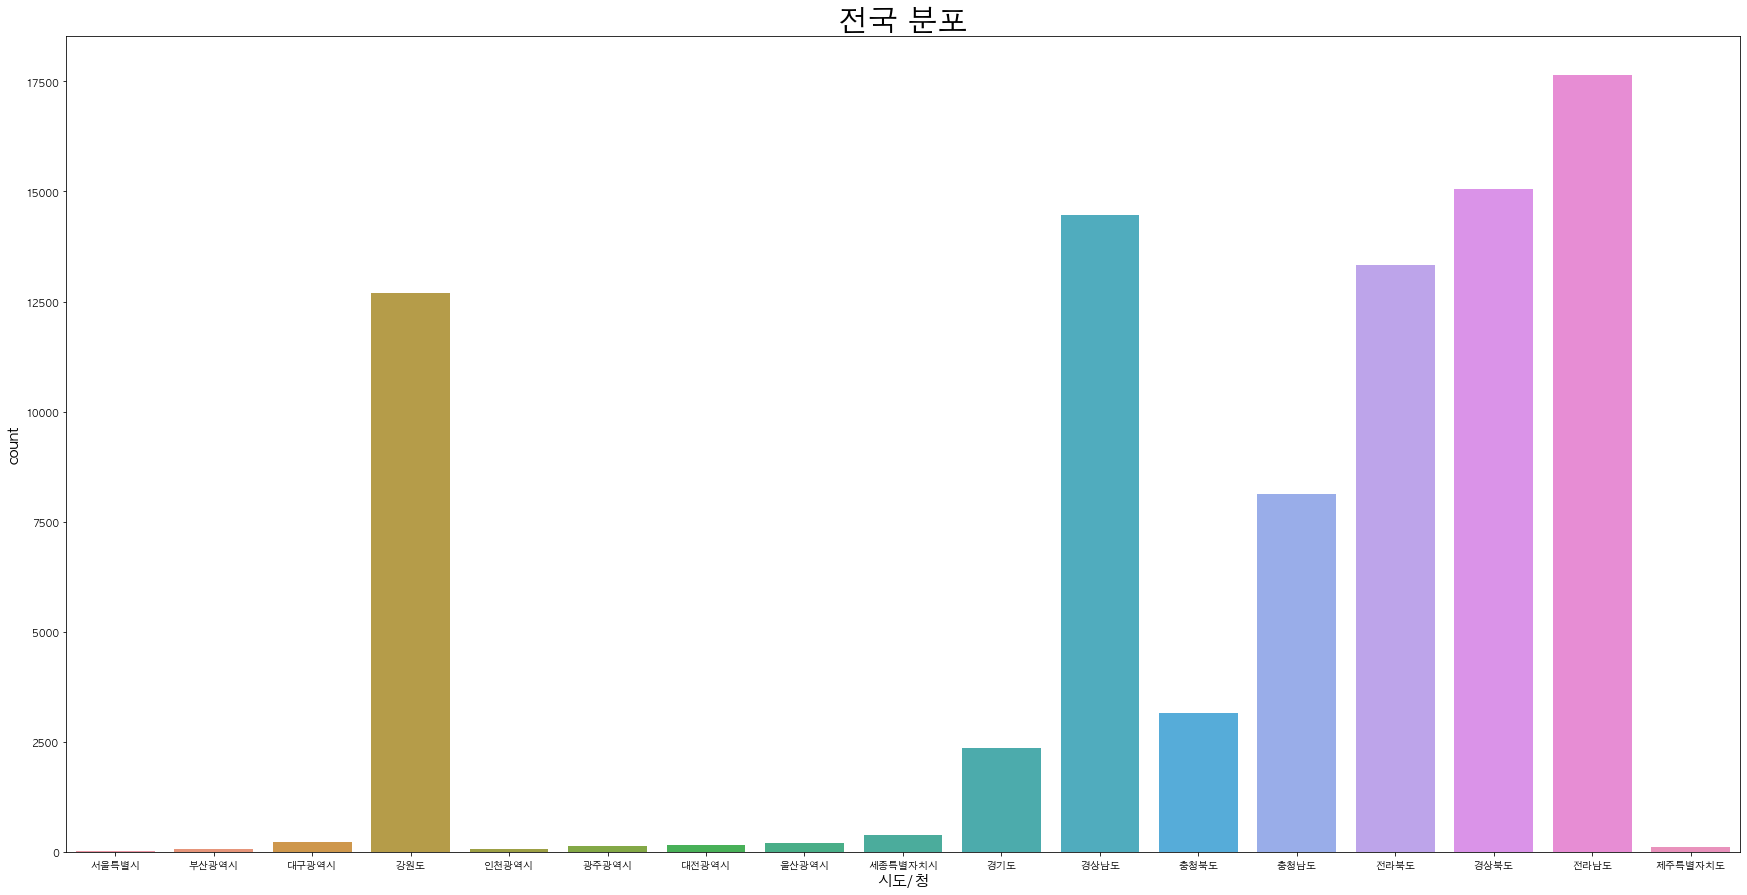

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["axes.labelsize"] = 15

ax = plt.figure(figsize=(30,15))
sns.countplot(x="시도/청", data=data)
plt.title('전국 분포', fontsize=30)
plt.show()

### 재배채취

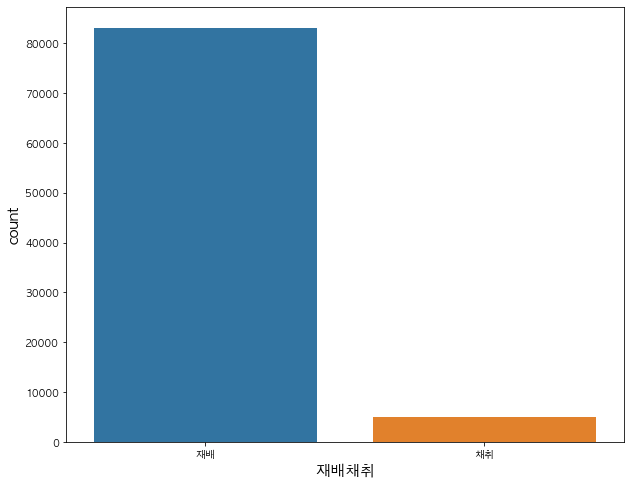

In [8]:
ax = plt.figure(figsize=(10,8))
sns.countplot(x="재배채취", data=data)
plt.show()

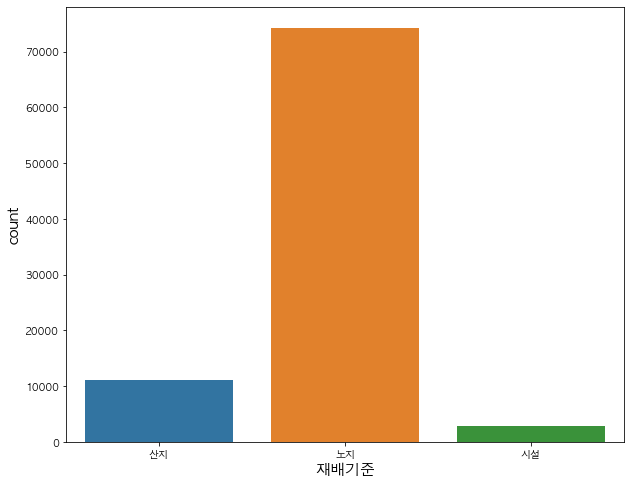

In [9]:
ax = plt.figure(figsize=(10,8))
sns.countplot(x="재배기준", data=data)
plt.show()

### 환산면적

In [10]:
data.replace({'환산면적': {0 : np.NaN}},
             inplace=True)
data.dropna(axis=0, inplace=True)

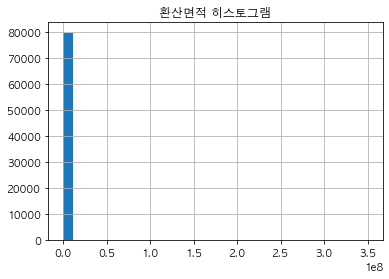

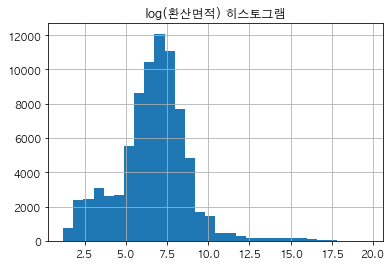

In [11]:
data['환산면적'].hist(bins=30)
plt.title('환산면적 히스토그램')
plt.show()

pd.Series(np.log(data['환산면적'].astype(float))).hist(bins=30)
plt.title('log(환산면적) 히스토그램')
plt.show()

In [12]:
data['환산면적'] = np.log(data['환산면적'].astype(float))
data.head()

,시도/청,시군구/관리소,재배채취,재배기준,환산면적,품목 대분류,품목 중분류,품목 소분류,생산량
19,서울특별시,강서구,재배,노지,8.285751,조경재,조경수,기타관목류,20000
26,서울특별시,서초구,재배,시설,6.899456,조경재,야생화,야생화,4000
27,서울특별시,서초구,재배,시설,6.899456,조경재,야생화,야생화,1000
28,서울특별시,서초구,재배,노지,7.410282,조경재,조경수,기타관목류,15000
31,서울특별시,강동구,재배,시설,8.103429,약용식물,약초,당귀,6000


### 품목 대분류

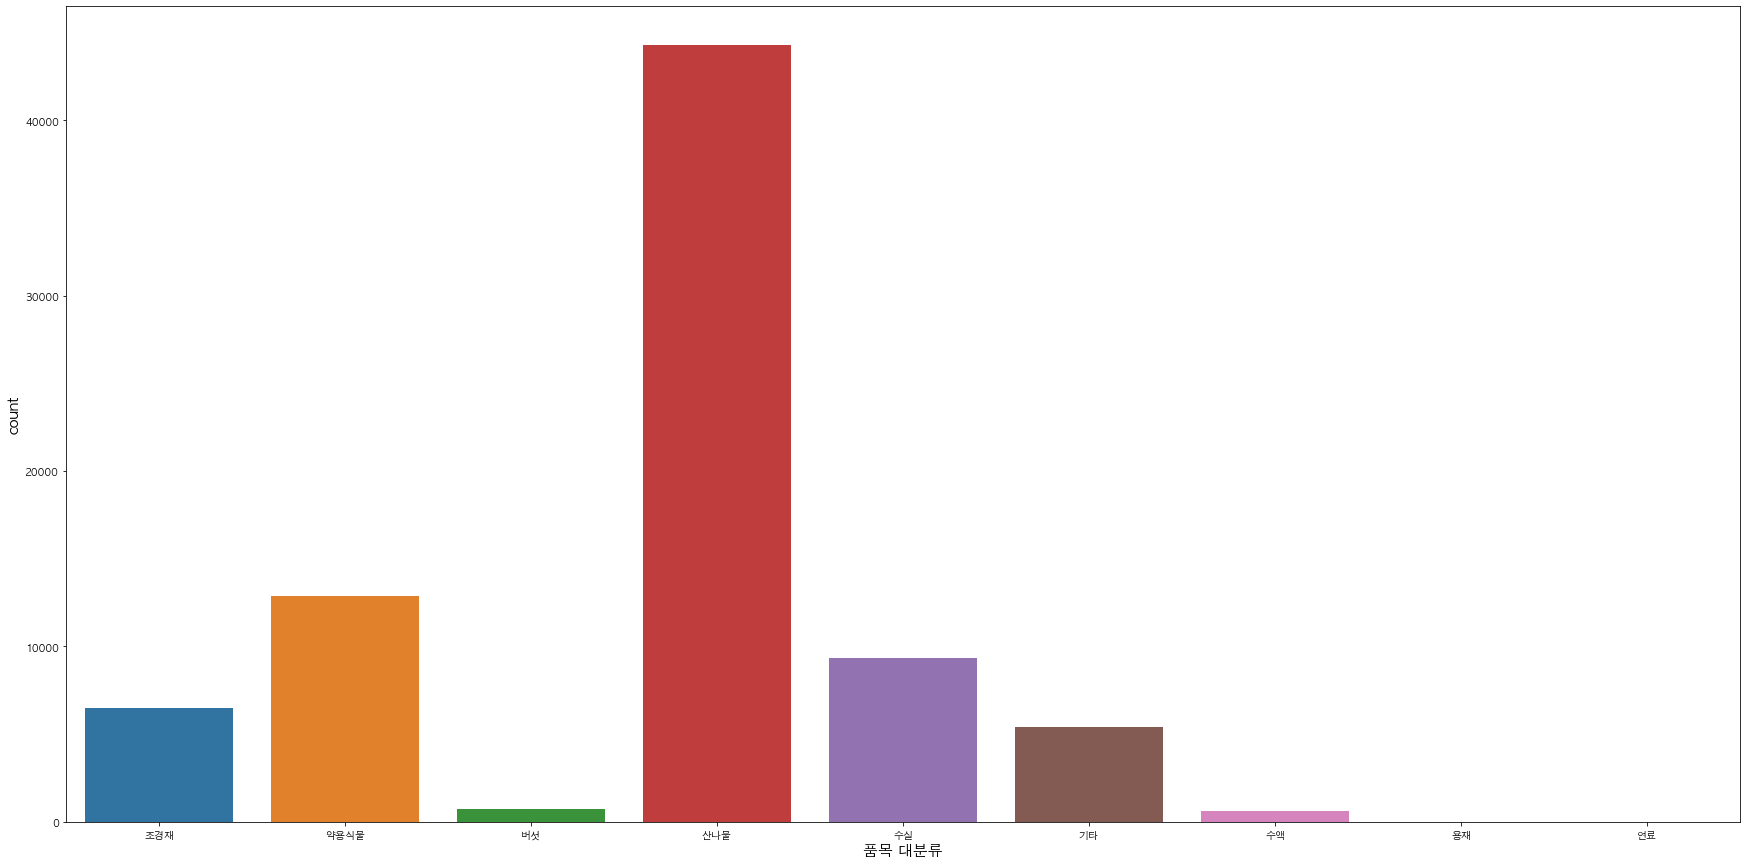

In [13]:
plt.rcParams["axes.labelsize"] = 15

ax = plt.figure(figsize=(30,15))
sns.countplot(x="품목 대분류", data=data)
plt.show()

### 품목 중분류

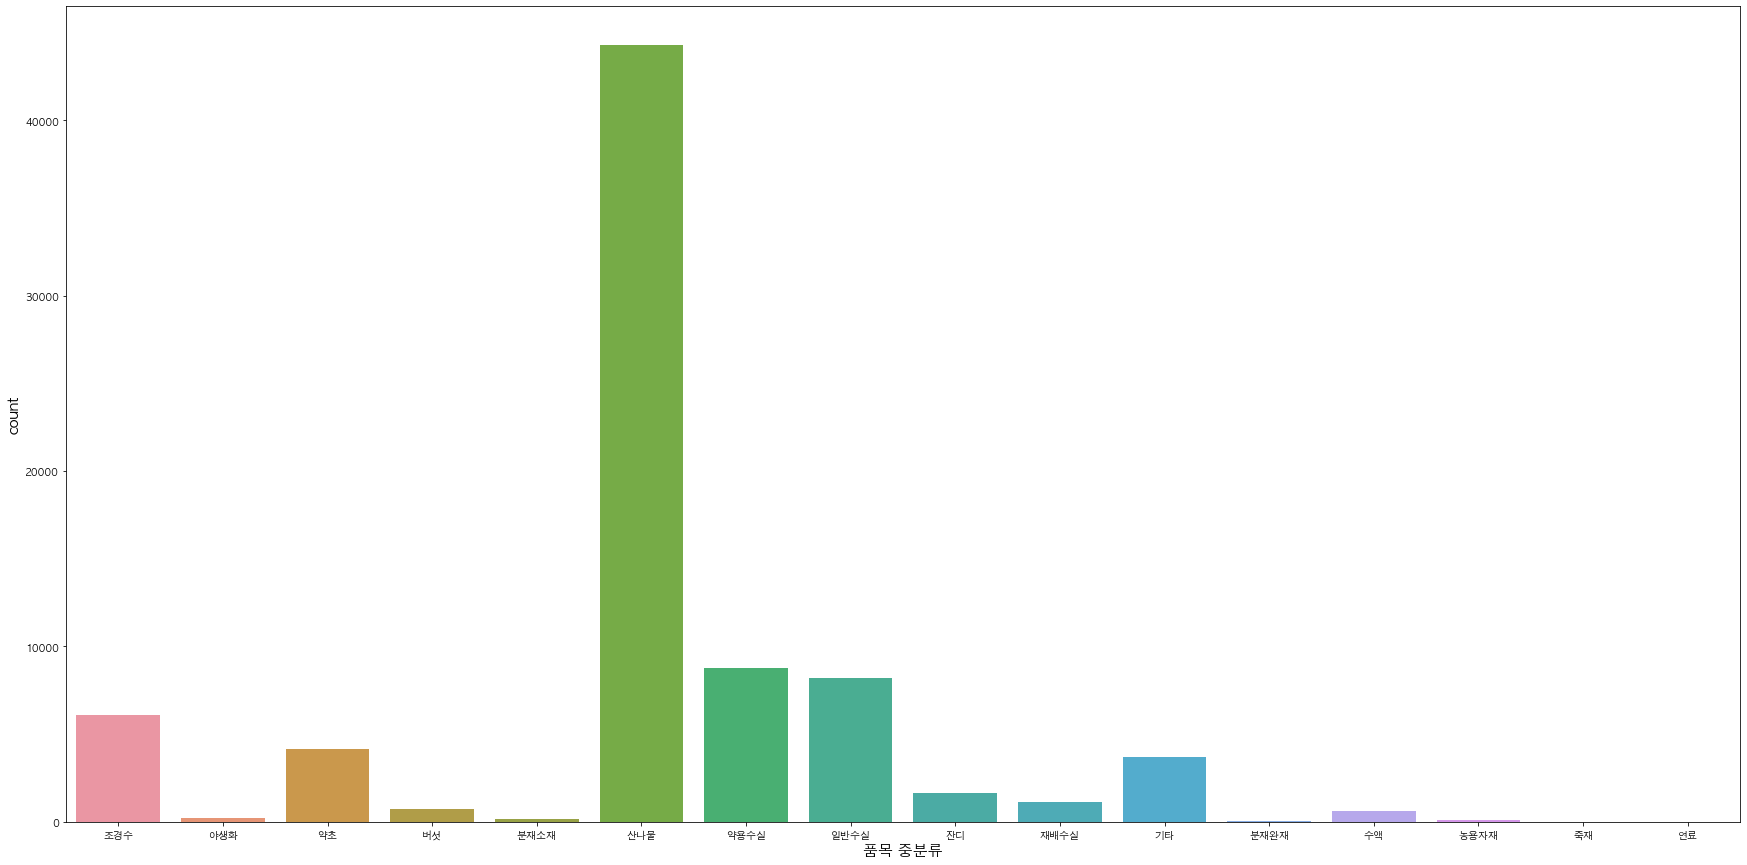

In [14]:
plt.rcParams["axes.labelsize"] = 15

ax = plt.figure(figsize=(30,15))
sns.countplot(x="품목 중분류", data=data)
plt.show()

### 품목 소분류

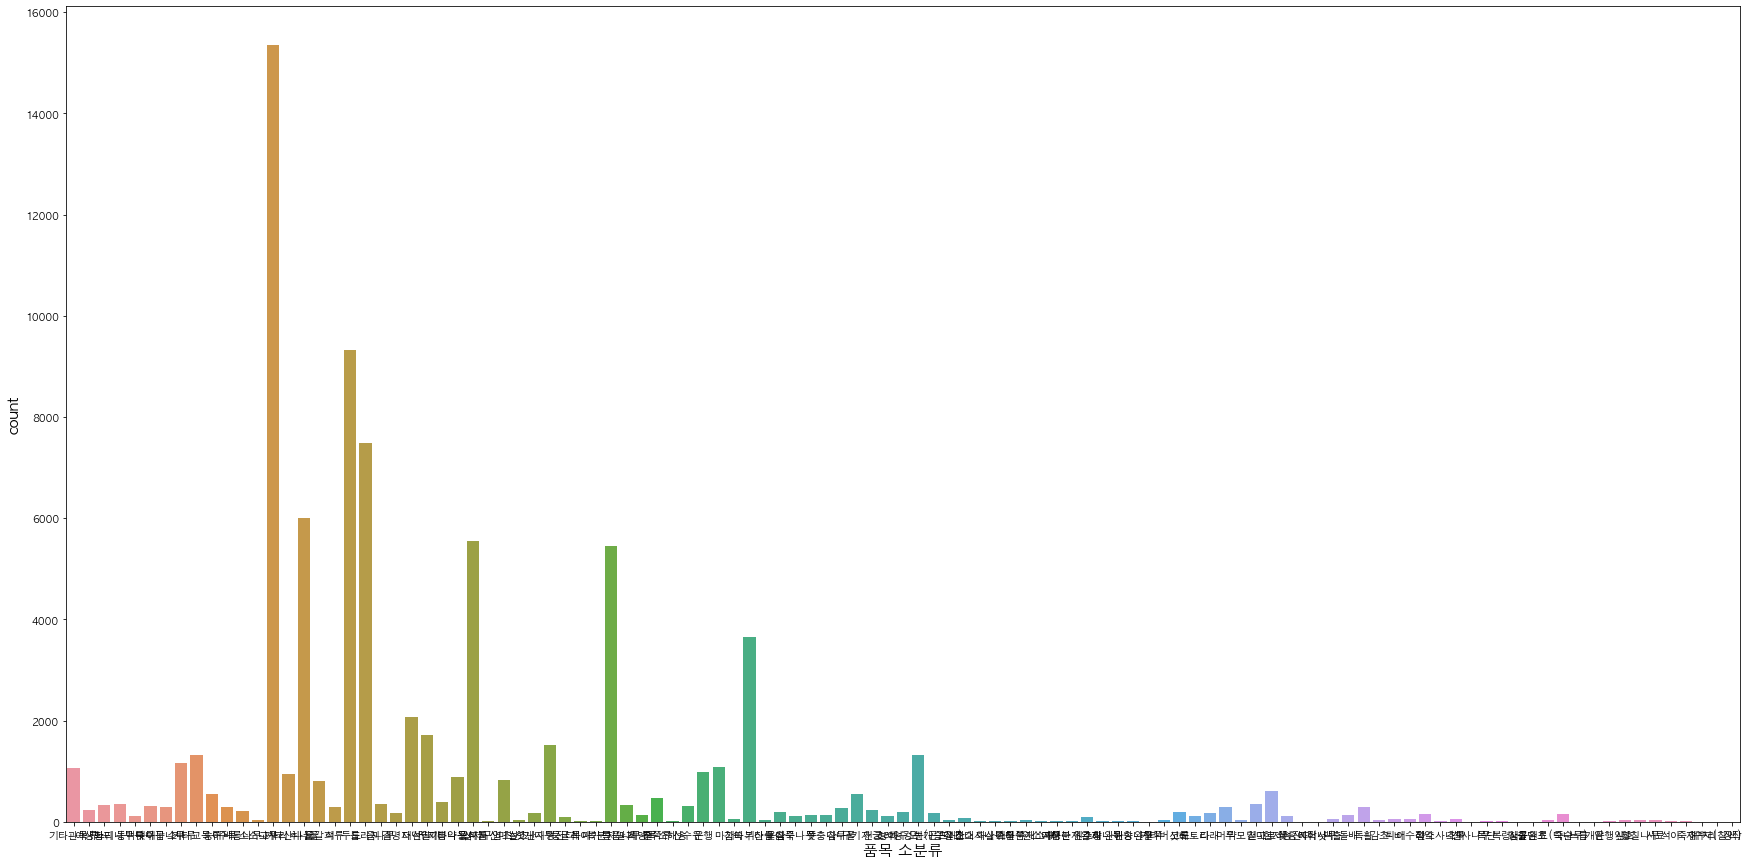

In [15]:
plt.rcParams["axes.labelsize"] = 15

ax = plt.figure(figsize=(30,15))
sns.countplot(x="품목 소분류", data=data)
plt.show()

### 생산량

In [16]:
data.replace({'생산량': {0 : np.NaN}},
             inplace=True)
data.dropna(axis=0, inplace=True)

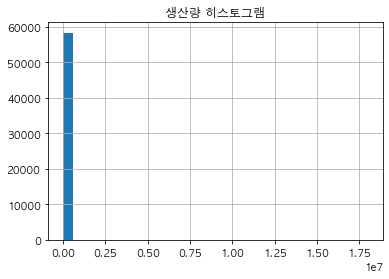

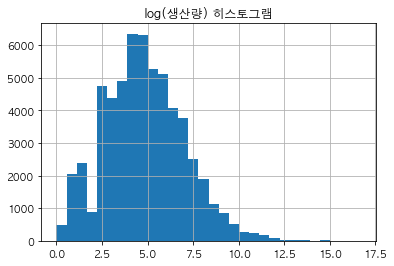

In [17]:
data['생산량'].hist(bins=30)
plt.title('생산량 히스토그램')
plt.show()

pd.Series(np.log(data['생산량'].astype(float))).hist(bins=30)
plt.title('log(생산량) 히스토그램')
plt.show()

In [18]:
data['생산량'] = np.log(data['생산량'].astype(float))
data.head()

,시도/청,시군구/관리소,재배채취,재배기준,환산면적,품목 대분류,품목 중분류,품목 소분류,생산량
19,서울특별시,강서구,재배,노지,8.285751,조경재,조경수,기타관목류,9.903488
26,서울특별시,서초구,재배,시설,6.899456,조경재,야생화,야생화,8.294050
27,서울특별시,서초구,재배,시설,6.899456,조경재,야생화,야생화,6.907755
28,서울특별시,서초구,재배,노지,7.410282,조경재,조경수,기타관목류,9.615805
31,서울특별시,강동구,재배,시설,8.103429,약용식물,약초,당귀,8.699515


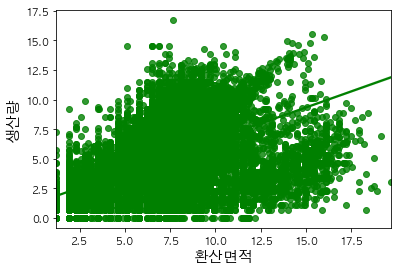

In [19]:
sns.regplot(x='환산면적', y='생산량', data=data, color='g')
plt.show()

## Numerical Variable processing

In [20]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(data.loc[:, ['환산면적', '생산량']])
scaled = minmax_scaler.fit_transform(data.loc[:, ['환산면적', '생산량']])
scaled

array([[0.38370847, 0.5928144 ],
       [0.30868349, 0.4964748 ],
       [0.30868349, 0.41349239],
       ...,
       [0.45604941, 0.54016966],
       [0.75959607, 0.67777647],
       [0.33107602, 0.42732655]])

## Categorival variable processing

In [21]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
ordinal = ordinal_encoder.fit_transform(data.loc[:, ['시군구/관리소', '재배채취', '재배기준', '품목 대분류', '품목 중분류', '품목 소분류']])
ordinal_encoder.categories_

[array(['가평군', '강동구', '강릉관리소', '강릉시', '강서구', '강진군', '강화군', '거제시', '거창군',
        '경산시', '경주시', '계룡시', '계양구', '고령군', '고성군', '고양시', '고창군', '고흥군',
        '곡성군', '공주시', '과천시', '광산구', '광양시', '광주시', '괴산군', '구례군', '구리시',
        '구미관리소', '구미시', '국립산림과학원', '군산시', '군위군', '금산군', '금정구', '기장군',
        '김제시', '김천시', '김포시', '김해시', '나주시', '남구', '남동구', '남양주시', '남원시',
        '남해군', '논산시', '단양관리소', '단양군', '달성군', '담양군', '당진시', '대덕구', '동구',
        '동두천시', '동해시', '무안군', '무주관리소', '무주군', '문경시', '밀양시', '보령시', '보성군',
        '보은관리소', '보은군', '봉화군', '부안군', '부여군', '부평구', '북구', '사천시', '산청군',
        '삼척관리소', '삼척시', '상주시', '서구', '서귀포시', '서산시', '서천군', '서초구', '성주군',
        '세종시', '속초시', '수성구', '수원관리소', '수원시', '순창군', '순천관리소', '순천시', '시흥시',
        '신안군', '아산시', '안동시', '안산시', '안성시', '안양시', '양구관리소', '양구군', '양산관리소',
        '양산시', '양양관리소', '양양군', '양주시', '양평군', '여수시', '여주시', '영광군', '영덕관리소',
        '영덕군', '영동군', '영암관리소', '영암군', '영양군', '영월관리소', '영월군', '영주관리소',
        '영주시', '영천시', '예산군', '예천군', '오산시', '옥천군', '옹진군', '

In [22]:
ordinal

array([[  4.,   0.,   0.,   8.,  14.,  10.],
       [ 78.,   0.,   2.,   8.,   7.,  67.],
       [ 78.,   0.,   2.,   8.,   7.,  67.],
       ...,
       [167.,   0.,   0.,   5.,   9.,  38.],
       [167.,   0.,   0.,   5.,   8.,  71.],
       [167.,   0.,   0.,   5.,   9.,  85.]])

In [23]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
onehot = onehot_encoder.fit_transform(ordinal)
print(onehot_encoder.categories_)
print(onehot.toarray().shape)

[array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 1

In [24]:
numeric_data_df = pd.DataFrame(scaled[:, 1], columns=['환산면적'])
onehot_data_df = pd.DataFrame(onehot.toarray())

X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
X_data_df

,환산면적,0,1,2,3,4,5,6,7,8,...,322,323,324,325,326,327,328,329,330,331
0,0.592814,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.496475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.413492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.575594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.520746,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58411,0.423905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58412,0.521440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58413,0.540170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58414,0.677776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X_data = np.array(X_data_df)
y_data = np.array(scaled[:, 1])

print(X_data.shape, y_data.shape)

(58416, 333) (58416,)


## Train Test split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(46732, 333) (11684, 333)


# Modeling

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor(random_state=1000)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1000)

In [28]:
dt_pred = dt.predict(X_test)
print(dt_pred[:10])

[0.23417039 0.18224254 0.33354443 0.28657521 0.34434414 0.40305575
 0.2756616  0.37200119 0.08298241 0.2756616 ]


In [29]:
mean_squared_error(y_test, dt_pred)

4.2644300650763044e-06

## RandomForest

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', random_state = 156)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=156)

In [31]:
rf_pred = rf.predict(X_test)
print(rf_pred[:10])

[0.23447393 0.18224254 0.33354443 0.28659273 0.34434414 0.40305575
 0.2756616  0.37200119 0.08298241 0.2663098 ]


In [32]:
mean_squared_error(y_test, rf_pred)

0.00017653132937190853

## Ridge

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

Ridge(alpha=0.01)

In [34]:
print(ridge.coef_)
print(ridge.intercept_)
print(ridge.score(X_train, y_train))

[ 9.99976200e-01  4.08816861e-07  1.81081078e-06  6.01015787e-07
  1.65573527e-07 -1.67284244e-06  8.50465668e-07  1.77226037e-06
 -1.41208397e-06  5.93655561e-09 -1.68395354e-06 -1.15092391e-06
 -2.43688859e-06  1.44259682e-06 -1.81548248e-06 -9.12685027e-07
 -1.48442232e-06  3.27788118e-08  2.19408061e-06 -1.02918773e-06
 -1.16080752e-06  1.78567325e-06 -1.97172698e-07 -6.71923019e-07
 -4.01668527e-08 -2.28081475e-06 -8.08452933e-07  1.39525786e-08
  2.60524297e-06 -8.54266685e-07  3.72657987e-06 -1.54714477e-06
  1.30180043e-06  5.12330452e-07  2.66201382e-07  1.79538283e-06
  1.74607265e-06 -1.28072071e-06 -1.69186473e-06  1.29895636e-07
  5.52263263e-07 -1.76625229e-06 -1.39000319e-06 -1.93736951e-06
  6.36711852e-07  1.84292753e-06 -5.40669999e-07  1.26998129e-06
  2.55745481e-07 -2.25963165e-06 -9.38993729e-08 -1.66761593e-06
  5.90150647e-07 -6.69174654e-07 -1.40729470e-06 -2.74995727e-06
  1.45024447e-07  7.24932044e-07  9.99250303e-08 -7.78470793e-07
 -7.65663804e-08  6.67670

In [35]:
ridge_pred = ridge.predict(X_test)
mean_squared_error(y_test, ridge_pred)

5.4600546296883626e-12

## LASSO

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [37]:
print(lasso.coef_)
print(lasso.intercept_)
print(lasso.score(X_train, y_train))

[ 0.94165669  0.          0.         -0.         -0.         -0.
  0.          0.         -0.          0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
  0.         -0.         -0.          0.          0.         -0.
  0.         -0.         -0.          0.         -0.         -0.
  0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.          0.          0.         -0.
 -0.         -0.          0.          0.         -0.         -0.
  0.         -0.          0.         -0.          0.         -0.
 -0.         -0.          0.          0.          0.         -0.
  0.          0.          0.         -0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.          0.          0.         -0.
 -0.          0.         -0.          0.         -0.          0.
  0.         -0.          0.          0.          0.         -0.
  0.         -0.         

In [39]:
lasso_pred = lasso.predict(X_test)
mean_squared_error(y_test, lasso_pred)

5.978317000809406e-05

## XGBoost

In [40]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=300)
xgb_reg.fit(X_train, y_train, verbose=False)

xgb_pred = xgb_reg.predict(X_test)
print(xgb_pred[:10])

[0.2341709  0.18223608 0.33354288 0.2865749  0.34434256 0.40305242
 0.27566218 0.37199935 0.08299155 0.27566218]


In [41]:
mean_squared_error(y_test, xgb_pred)

6.39597132690279e-08

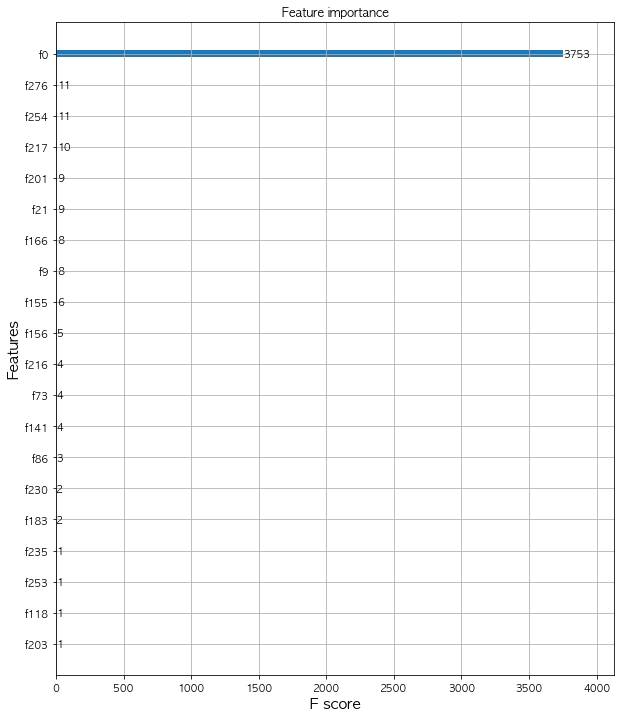

In [42]:
from xgboost import plot_importance

plot_importance(xgb_reg, max_num_features=20)

fig = plt.gcf()
fig.set_size_inches(10, 12)

## LightGBM

In [43]:
import lightgbm as lgb


lgb_reg = lgb.LGBMRegressor(n_estimators=500)
lgb_reg.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000,
        verbose = False)

LGBMRegressor(n_estimators=500)

In [44]:
lgb_pred = lgb_reg.predict(X_test)
print(lgb_pred[:10])

[0.23418178 0.18219725 0.33343977 0.28659545 0.34434422 0.40288173
 0.27565764 0.37198224 0.08298978 0.27565764]


In [45]:
print(y_test[:10])

[0.23417039 0.18224254 0.33354443 0.28657521 0.34434414 0.40305575
 0.2756616  0.37200119 0.08298241 0.2756616 ]


In [46]:
mean_squared_error(y_test, lgb_pred)

1.5088169852631564e-06

# Ensemble

In [47]:
import torch
from sklearn.metrics import mean_squared_error

class EnsembleRegressor:
    def __init__(self, models, weights=None):
        
        self.models = models
        self.weights = weights
        
        self.pred_list = []
        
    def predict(self, X_test): 
        for model in models.values():
            self.pred_list.append(model.predict(X_test))
        preds = np.array(self.pred_list)
            

        prediction = np.average(preds, axis=0, weights=self.weights)

        return prediction
    
    def random_search(self, X_test, y_test, num_search):
        weights = torch.softmax(torch.rand(num_search, len(self.models)), axis=1).numpy()
        
        for model in models.values():
            self.pred_list.append(model.predict(X_test))
        preds = np.array(self.pred_list)

        mse = []
        for i in range(num_search):
            prediction = np.average(preds, axis=0, weights=weights[i])
            mse_ = mean_squared_error(y_test, prediction)
            mse.append(mse_)
        
        result = pd.DataFrame(weights, columns=['w1', 'w2', 'w3', 'w4'])
        result['MSE'] = mse

        return result.sort_values('MSE', ascending=True)

In [48]:
models = {'DecisionTree' : dt, 'RandomForest' : rf,
          'XGBOOST': xgb_reg, 'LightGBM' : lgb_reg}

ensemble = EnsembleRegressor(models, weights=None)
result = ensemble.random_search(X_test, y_test, 10000)
result.head(10)

,w1,w2,w3,w4,MSE
5128,0.305603,0.113362,0.297876,0.283160,0.000003
4509,0.288856,0.119187,0.317146,0.274812,0.000003
4711,0.322295,0.121851,0.315153,0.240701,0.000003
7330,0.313272,0.121647,0.299640,0.265440,0.000003
8960,0.245115,0.124040,0.330903,0.299942,0.000003
8680,0.293902,0.121821,0.282425,0.301852,0.000003
718,0.259483,0.125001,0.308023,0.307492,0.000003
8524,0.310954,0.124606,0.324430,0.240009,0.000003
5614,0.306399,0.124313,0.291747,0.277541,0.000003
9455,0.269456,0.125374,0.300489,0.304681,0.000003


In [49]:
optimal_weight = result.iloc[0,:4].tolist()
print(optimal_weight)

[0.3056030869483948, 0.11336161196231842, 0.2978757619857788, 0.2831595838069916]


In [50]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)

preds = ensemble.predict(X_test)
print(preds[:10])

[0.23420818 0.18222779 0.33351433 0.28658284 0.34434369 0.40300548
 0.27566065 0.37199528 0.08298722 0.27460052]


In [51]:
print( y_test[:10])

[0.23417039 0.18224254 0.33354443 0.28657521 0.34434414 0.40305575
 0.2756616  0.37200119 0.08298241 0.2756616 ]


In [52]:
mean_squared_error(y_test, preds)

2.91585546882676e-06

# Evaluation

In [53]:
inverse_transformed_pred = np.exp(preds * minmax_scaler.data_range_[1] + minmax_scaler.data_min_[1])
inverse_transformed_y_test = np.exp(y_test * minmax_scaler.data_range_[1] + minmax_scaler.data_min_[1])

print(inverse_transformed_pred[:10])
print(inverse_transformed_y_test[:10])

[ 50.03157206  20.99482551 262.86779618 120.01528648 314.99765157
 839.29489376  99.99842108 499.95062115   4.0003213   98.24299161]
[ 50.  21. 263. 120. 315. 840. 100. 500.   4. 100.]
